In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Info for Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15 

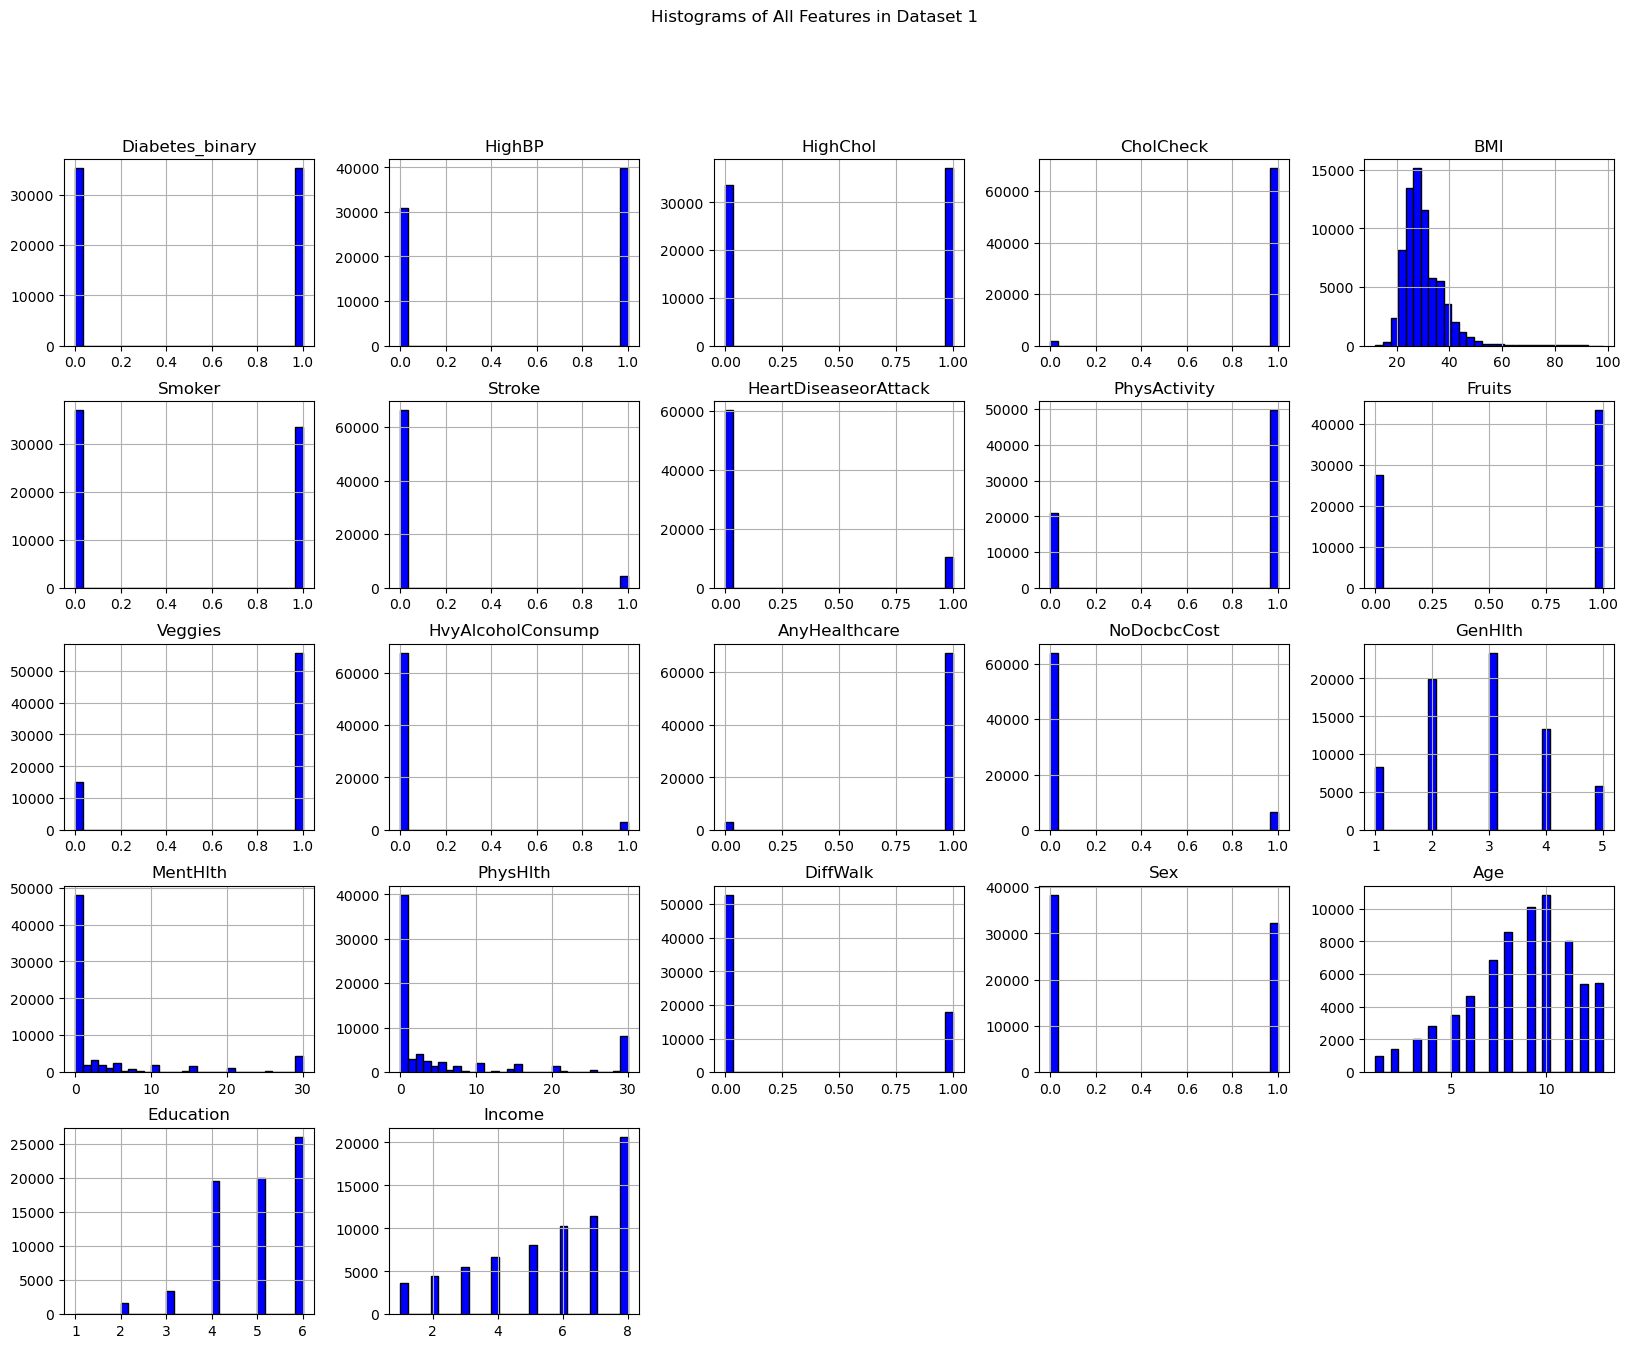

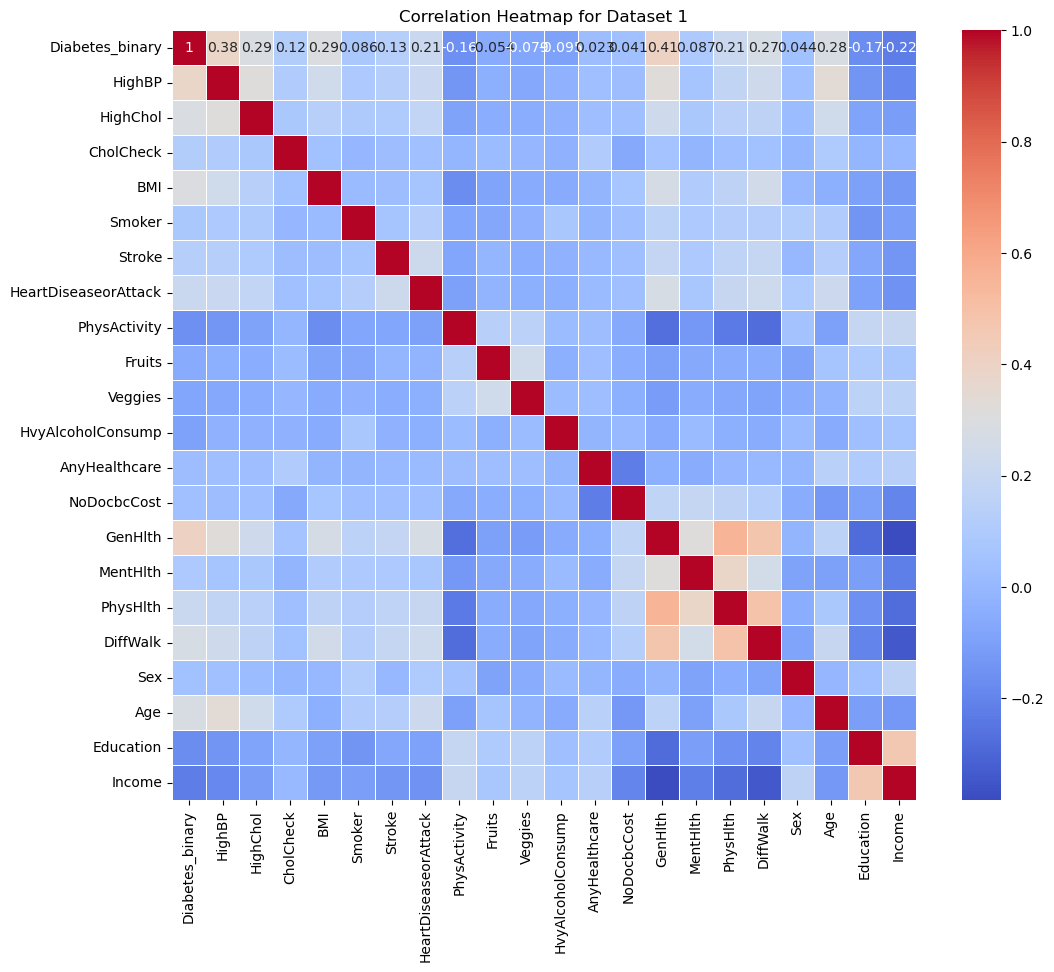

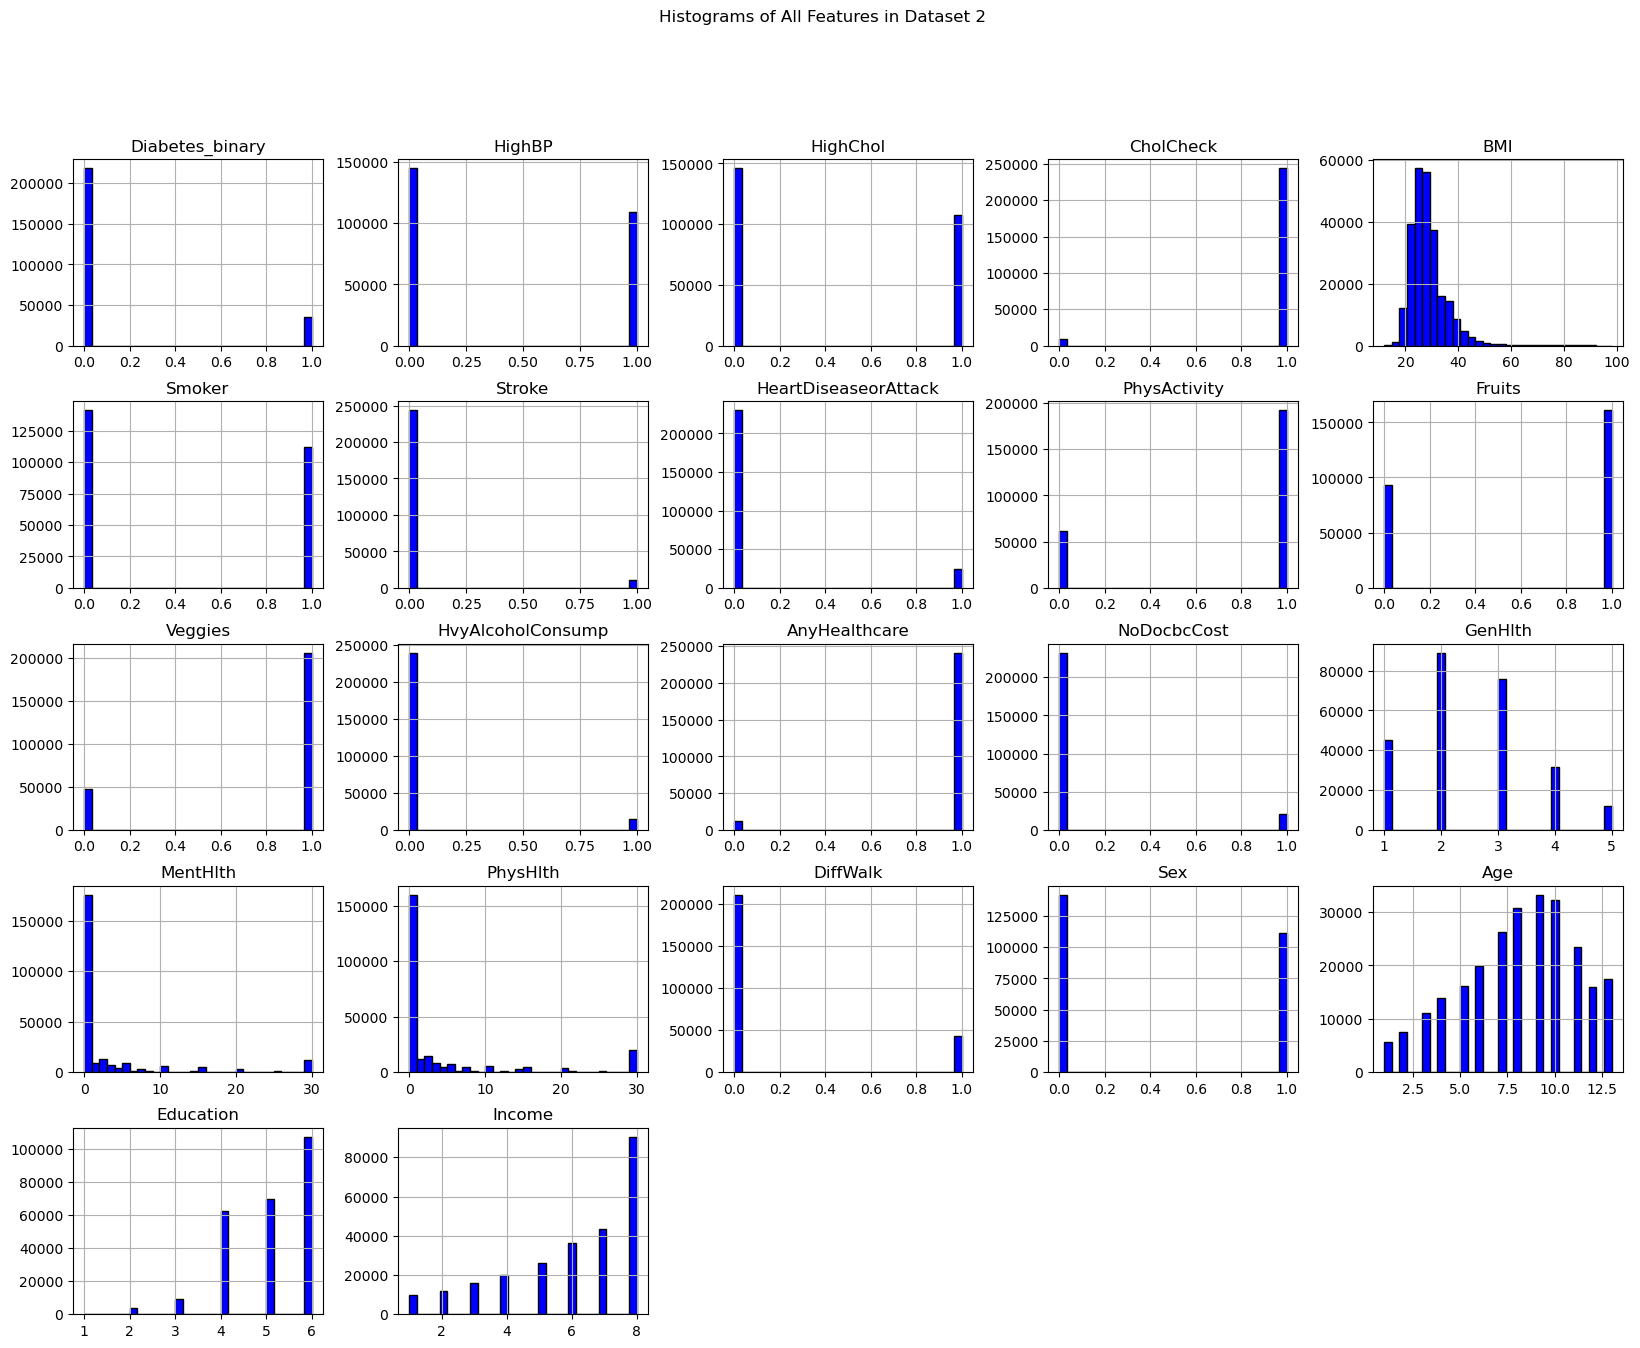

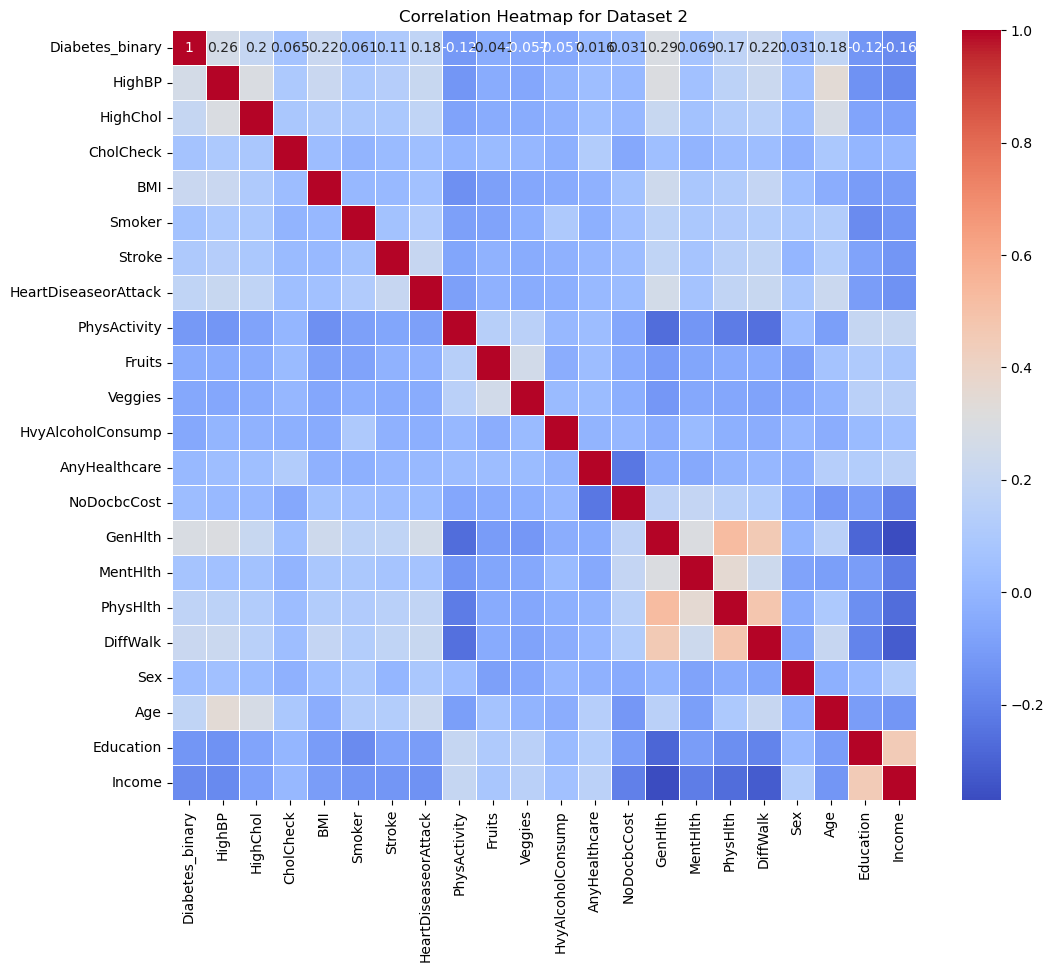

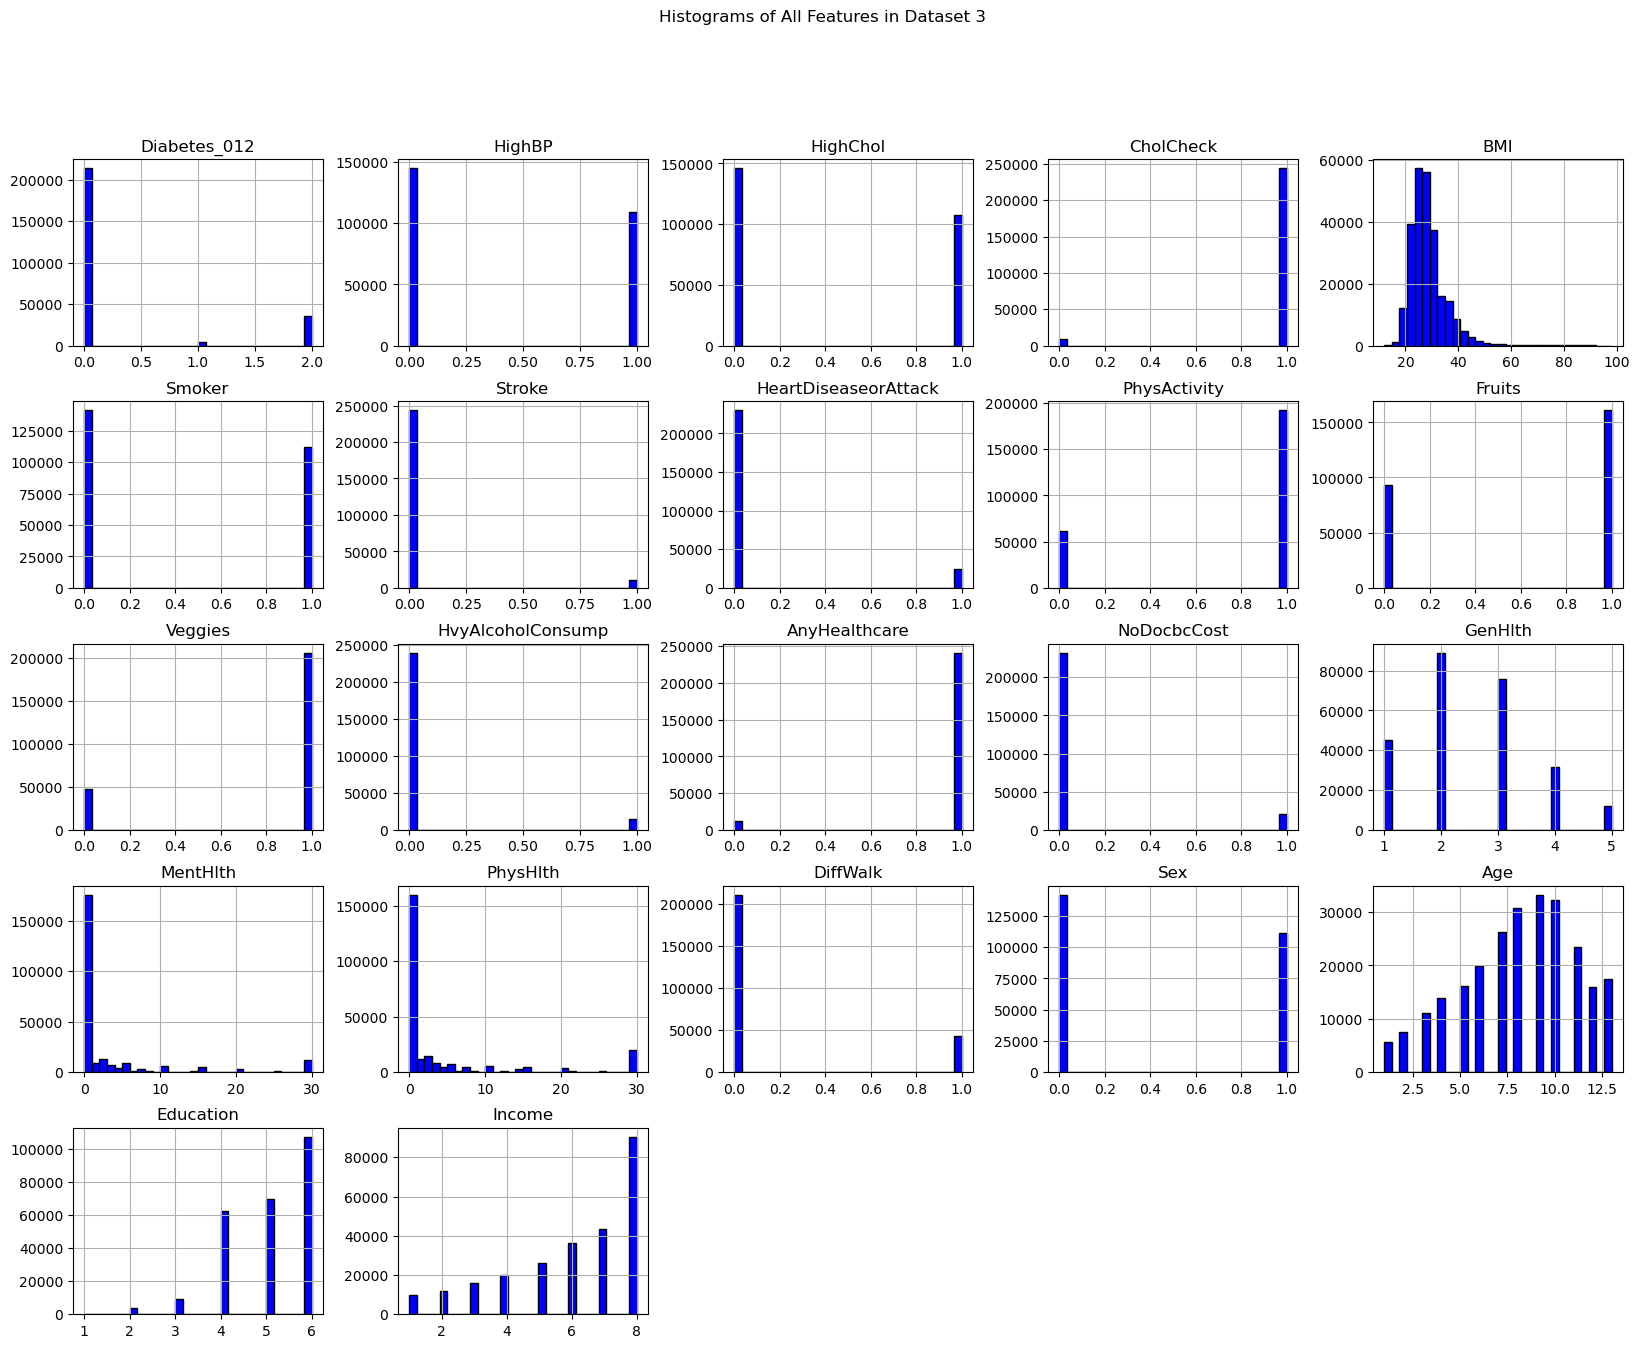

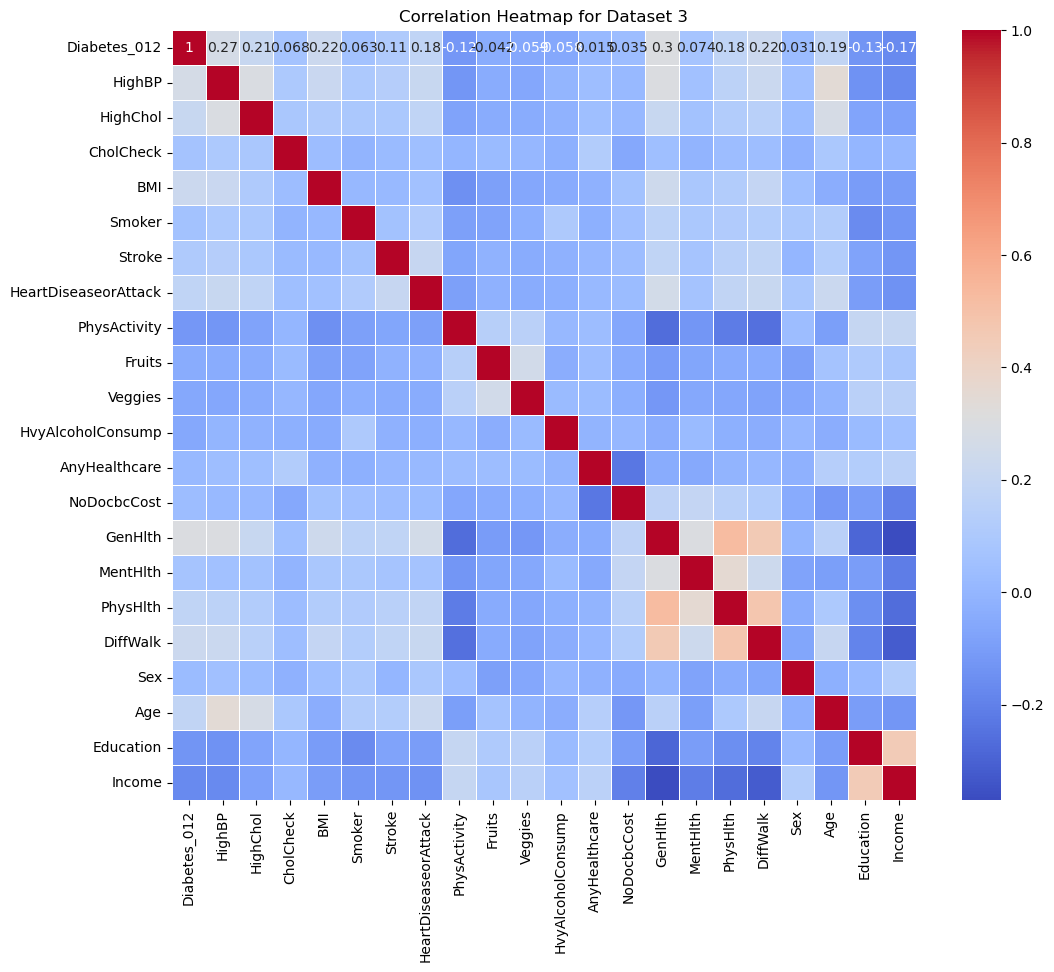

In [19]:
file_path1 = 'C:\\Users\\melih.kalkan\\Desktop\\diabet data\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
file_path2 = 'C:\\Users\\melih.kalkan\\Desktop\\diabet data\\diabetes_binary_health_indicators_BRFSS2015.csv'
file_path3 = 'C:\\Users\\melih.kalkan\\Desktop\\diabet data\\diabetes_012_health_indicators_BRFSS2015.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

print("Info for Dataset 1:")
df1.info()
print("\nSummary statistics for Dataset 1:")
print(df1.describe())

print("\nInfo for Dataset 2:")
df2.info()
print("\nSummary statistics for Dataset 2:")
print(df2.describe())

print("\nInfo for Dataset 3:")
df3.info()
print("\nSummary statistics for Dataset 3:")
print(df3.describe())
def visualize_data(df, dataset_name):
    # Plot histograms for each feature in the dataset
    df.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
    plt.suptitle(f'Histograms of All Features in {dataset_name}')
    plt.show()
    
    # Plot the correlation heatmap for the dataset
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for {dataset_name}')
    plt.show()

# Visualize data for each dataset
visualize_data(df1, "Dataset 1")
visualize_data(df2, "Dataset 2")
visualize_data(df3, "Dataset 3")


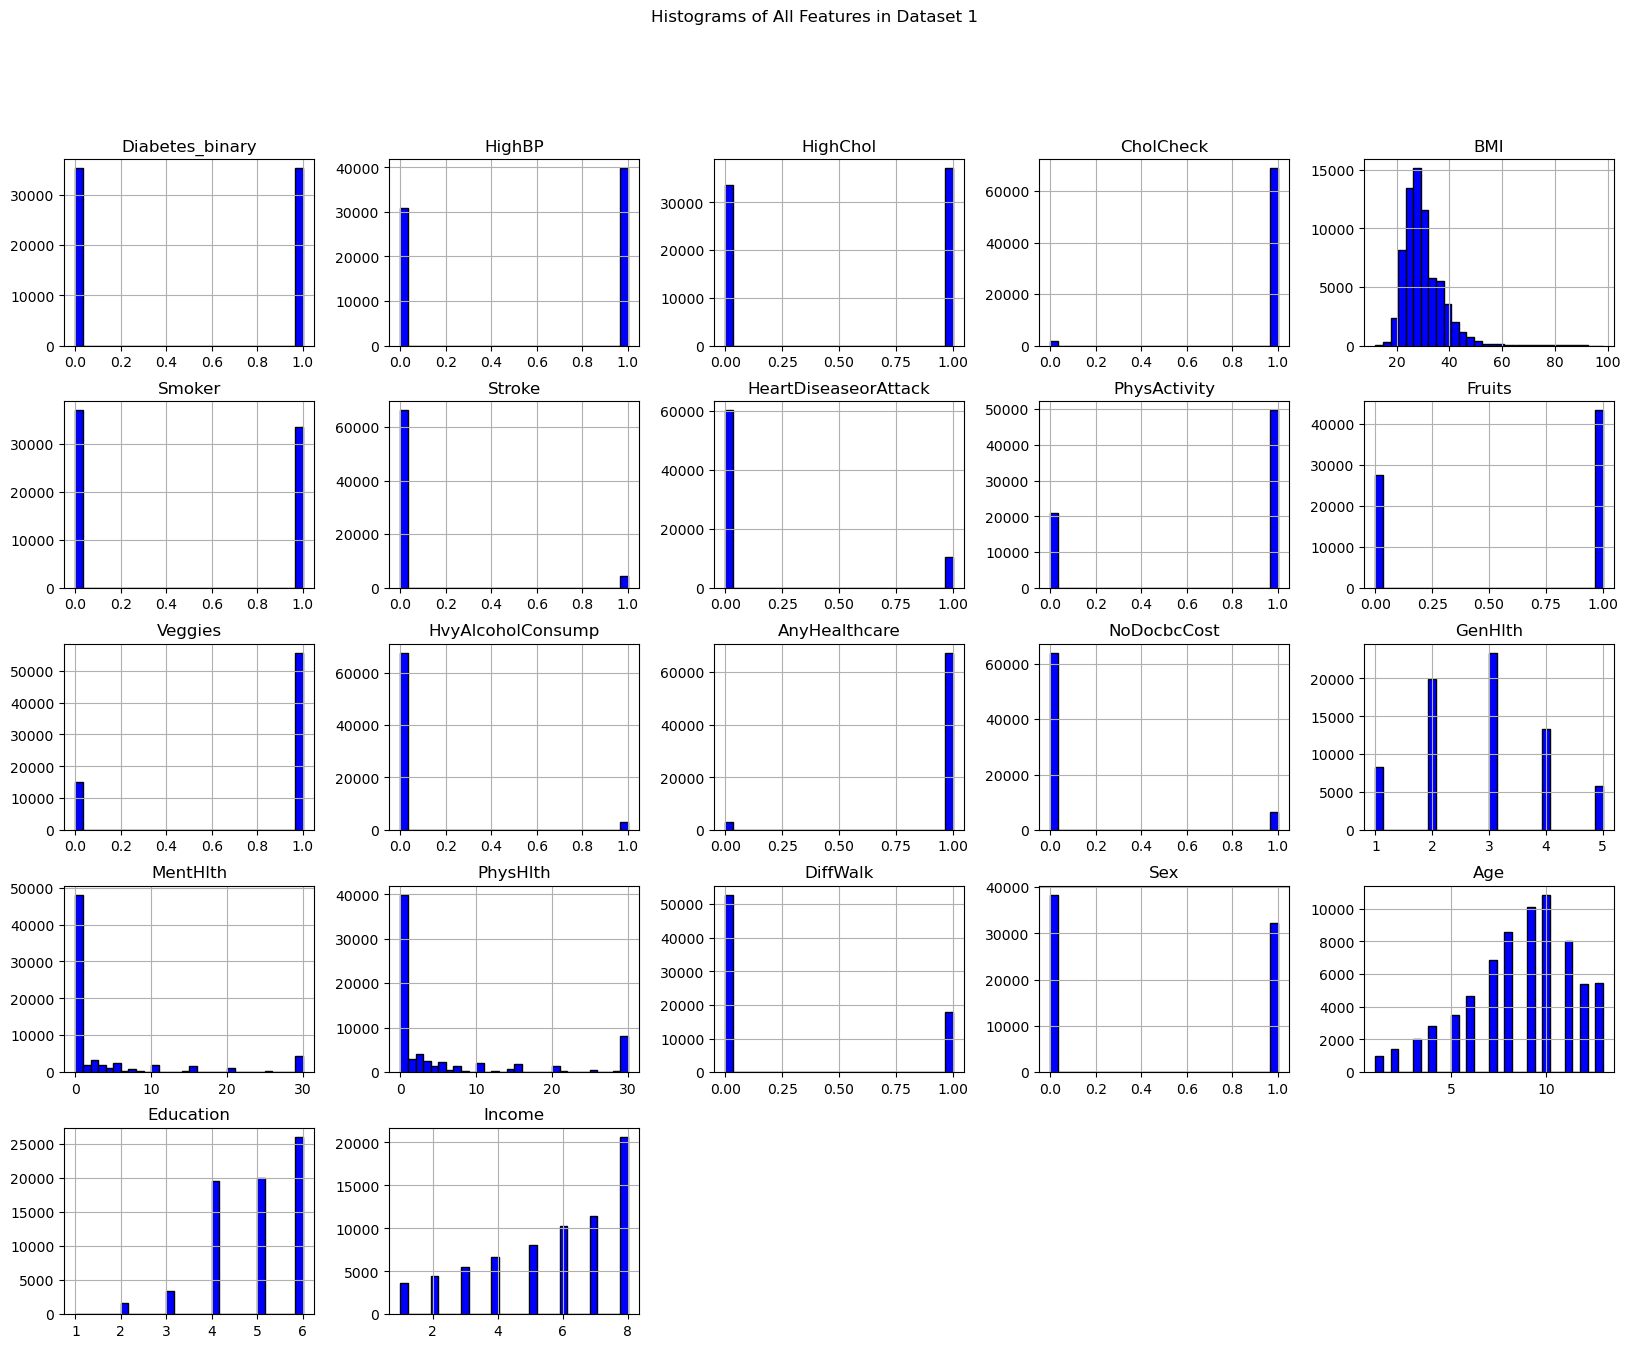

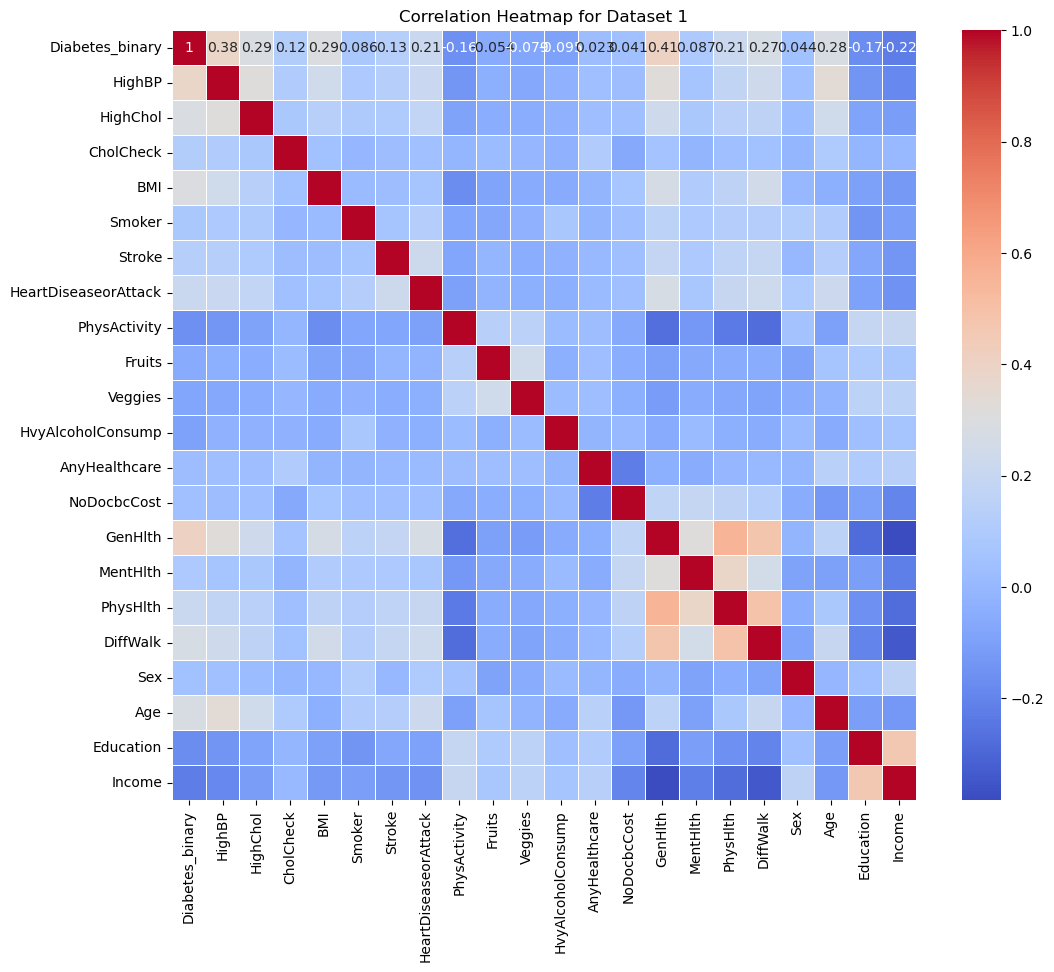

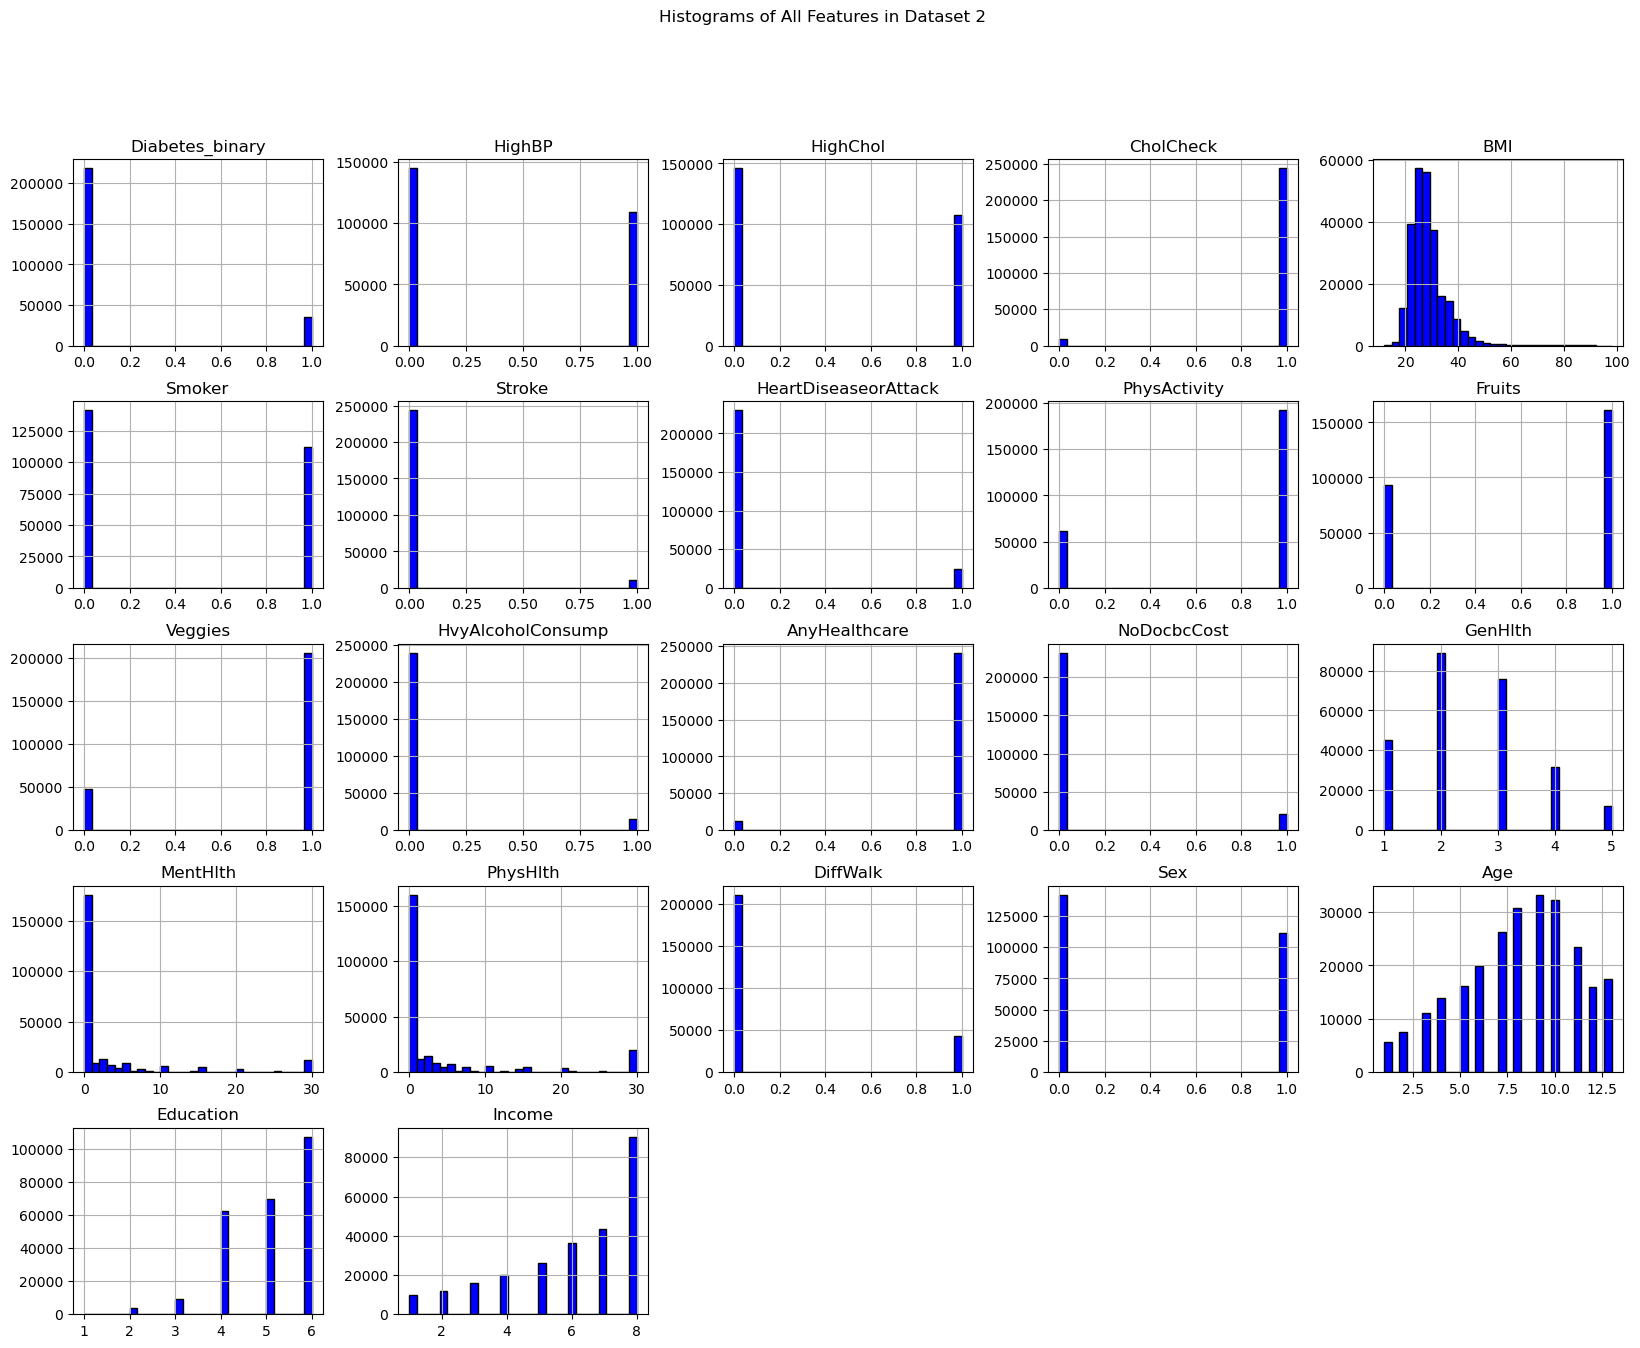

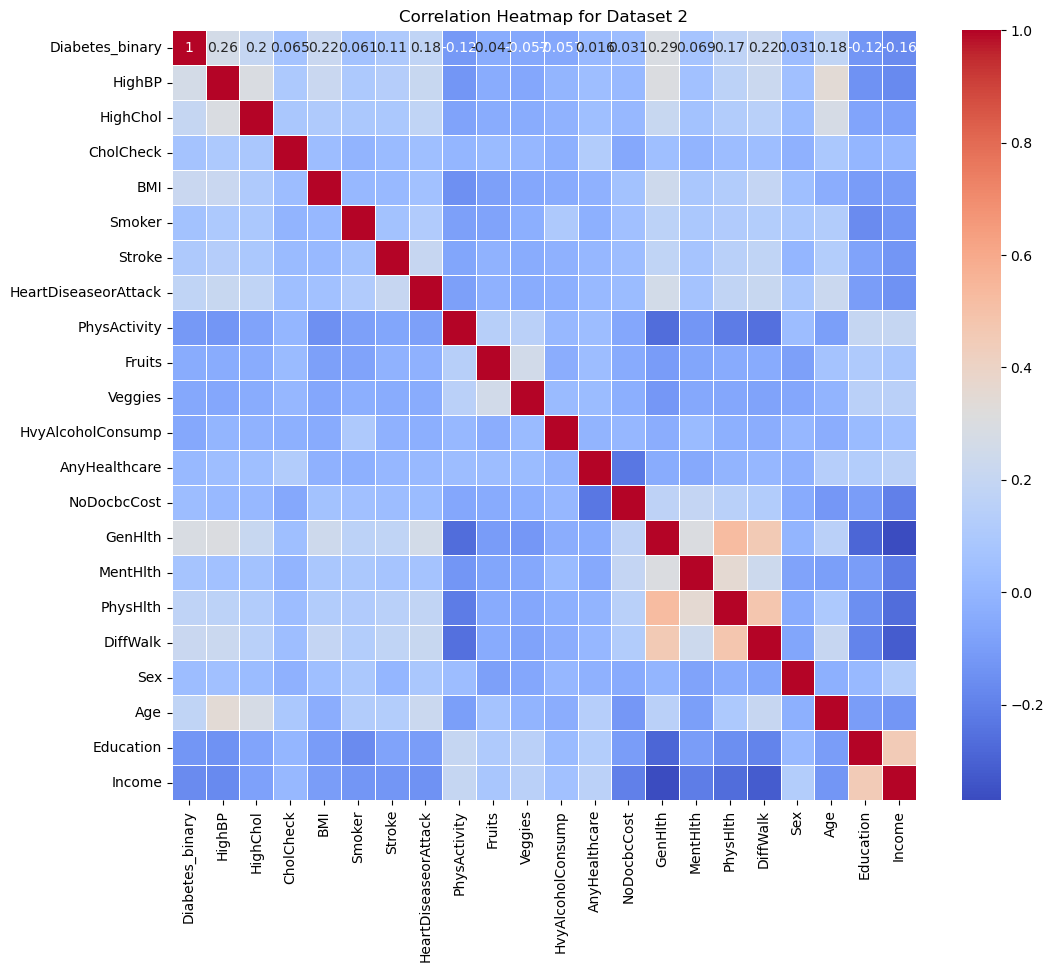

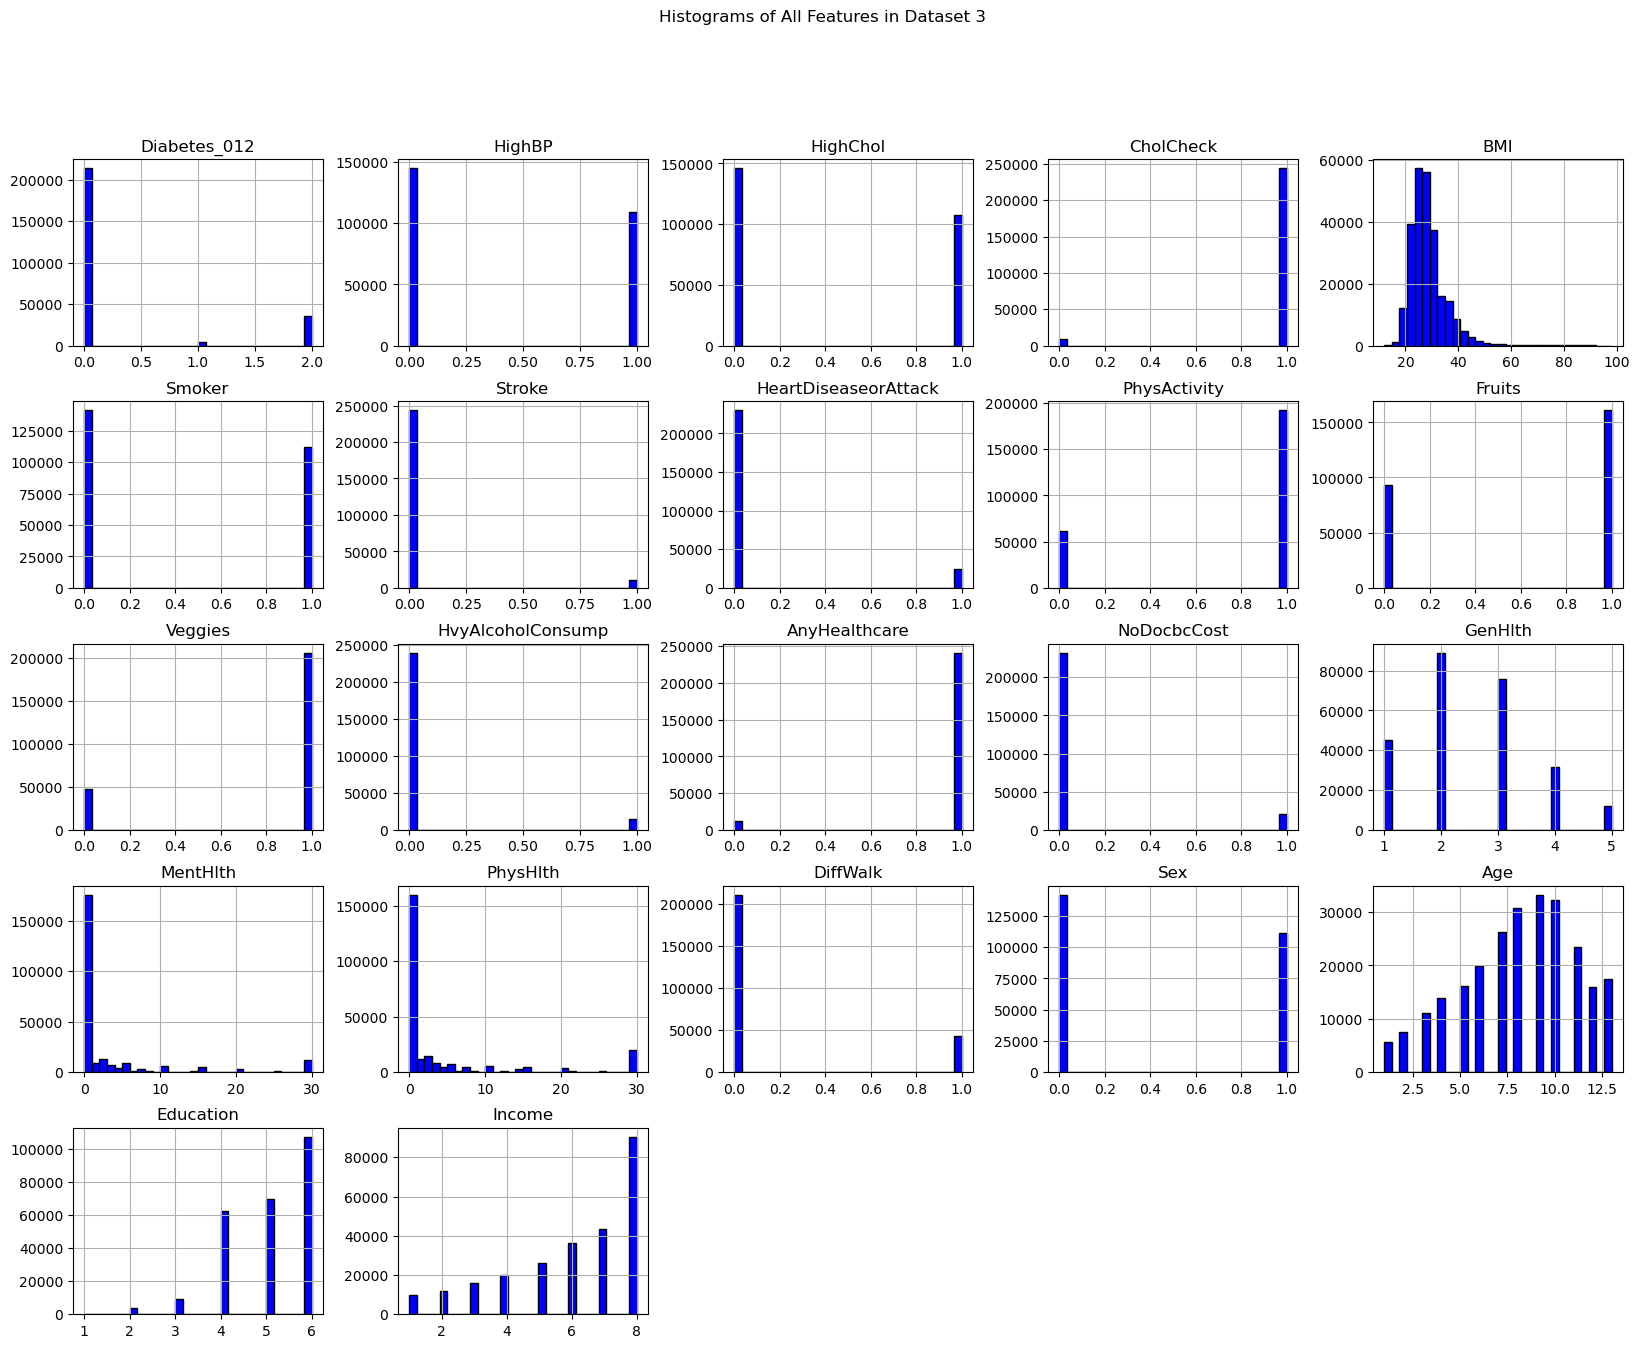

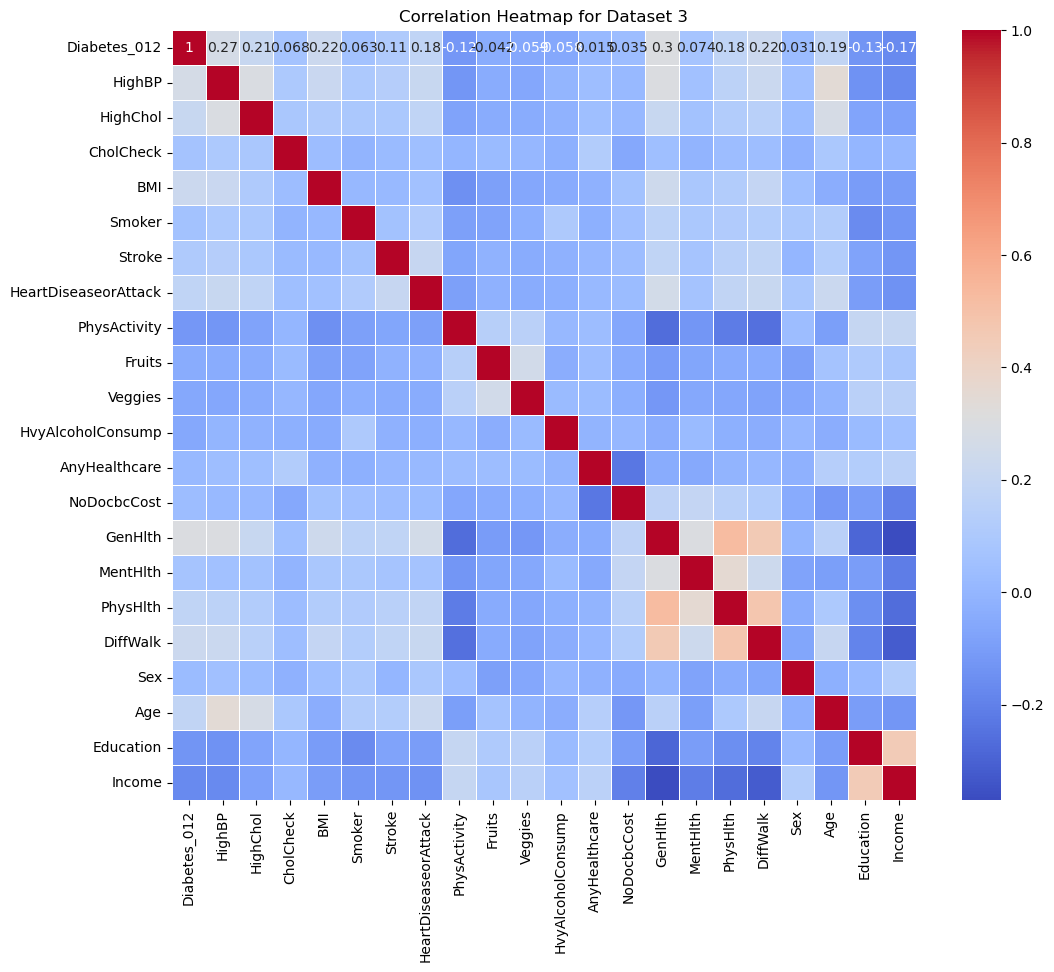

In [20]:
def visualize_data(df, dataset_name):
    # Plot histograms for each feature in the dataset
    df.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
    plt.suptitle(f'Histograms of All Features in {dataset_name}')
    plt.show()
    
    # Plot the correlation heatmap for the dataset
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for {dataset_name}')
    plt.show()

# Visualize data for each dataset
visualize_data(df1, "Dataset 1")
visualize_data(df2, "Dataset 2")
visualize_data(df3, "Dataset 3")


In [22]:
def process_and_train(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Classifier': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'KNeighbors Classifier': KNeighborsClassifier()
    }
    
    param_grid = {
        'Logistic Regression': {'C': [0.1, 1, 10]},
        'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
        'Gradient Boosting Classifier': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
        'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]},
        'KNeighbors Classifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    }
    
    best_estimators = {}
    for model_name in models:
        random_search = RandomizedSearchCV(models[model_name], param_distributions=param_grid[model_name], n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_estimators[model_name] = random_search.best_estimator_
    
    return best_estimators, scaler, X_test, y_test

# Process and train models for each dataset
best_estimators1, scaler1, X_test1, y_test1 = process_and_train(df1, 'Diabetes_binary')
best_estimators2, scaler2, X_test2, y_test2 = process_and_train(df2, 'Diabetes_binary')
best_estimators3, scaler3, X_test3, y_test3 = process_and_train(df3, 'Diabetes_012')


C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use

Evaluating Logistic Regression...
Accuracy: 0.7484970648560718
Confusion Matrix:
[[5156 1934]
 [1622 5427]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139




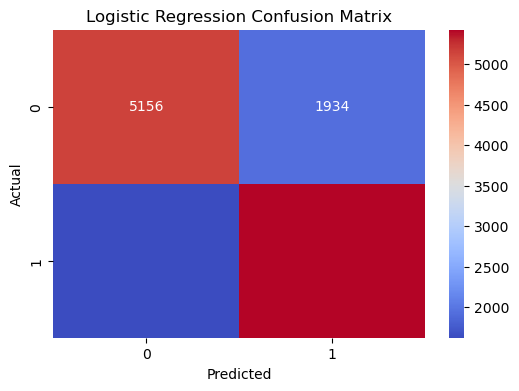

Evaluating Random Forest...
Accuracy: 0.7506895820072141
Confusion Matrix:
[[5003 2087]
 [1438 5611]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139




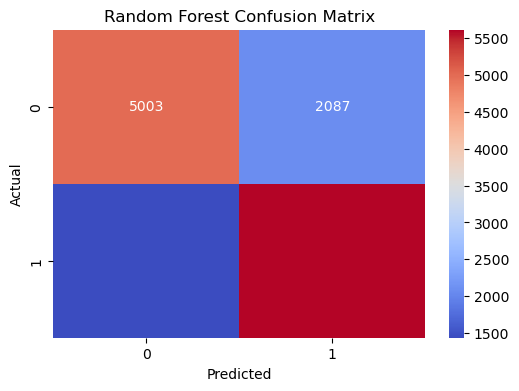

Evaluating Gradient Boosting Classifier...
Accuracy: 0.7556404271872127
Confusion Matrix:
[[5051 2039]
 [1416 5633]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139




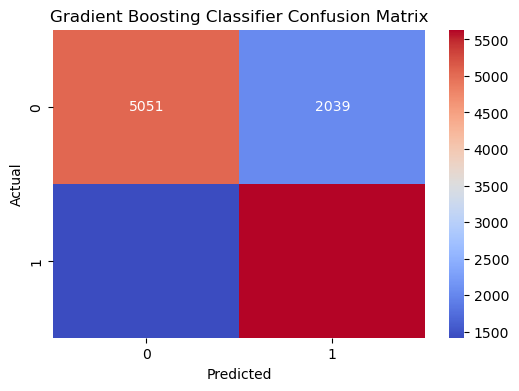

Evaluating AdaBoost...
Accuracy: 0.7518212037626424
Confusion Matrix:
[[5167 1923]
 [1586 5463]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      7090
         1.0       0.74      0.78      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139




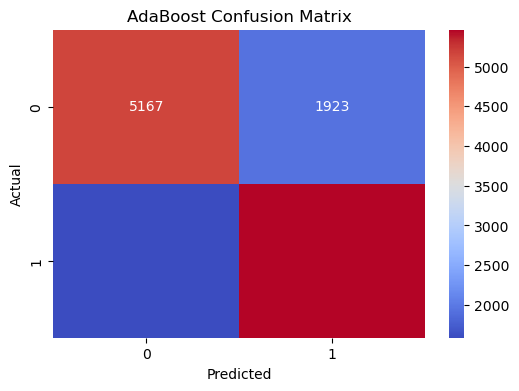

Evaluating KNeighbors Classifier...
Accuracy: 0.7188627201357947
Confusion Matrix:
[[4848 2242]
 [1733 5316]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      7090
         1.0       0.70      0.75      0.73      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139




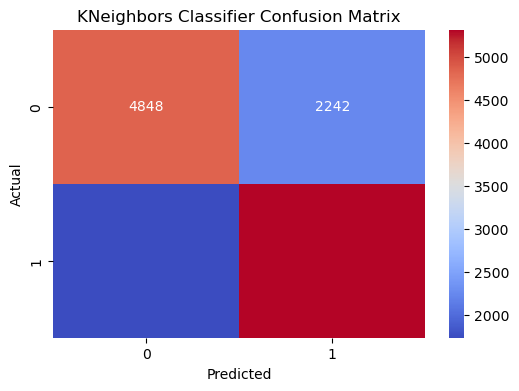

Evaluating Logistic Regression...
Accuracy: 0.8658546199936928
Confusion Matrix:
[[42773   966]
 [ 5840  1157]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736




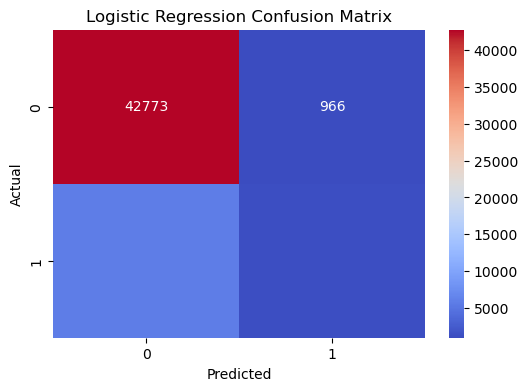

Evaluating Random Forest...
Accuracy: 0.8662291075370545
Confusion Matrix:
[[43324   415]
 [ 6372   625]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43739
         1.0       0.60      0.09      0.16      6997

    accuracy                           0.87     50736
   macro avg       0.74      0.54      0.54     50736
weighted avg       0.83      0.87      0.82     50736




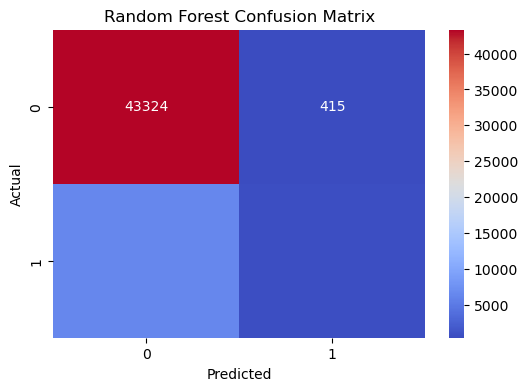

Evaluating Gradient Boosting Classifier...
Accuracy: 0.8676087984862819
Confusion Matrix:
[[42773   966]
 [ 5751  1246]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.18      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736




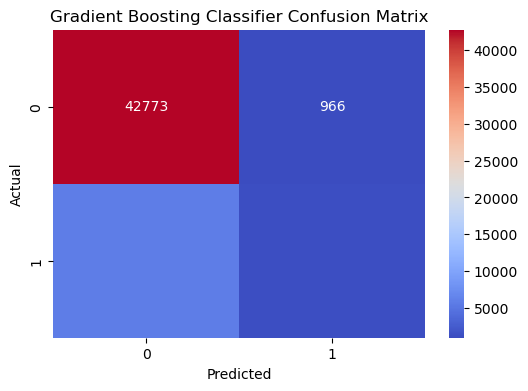

Evaluating AdaBoost...
Accuracy: 0.8666035950804163
Confusion Matrix:
[[42611  1128]
 [ 5640  1357]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93     43739
         1.0       0.55      0.19      0.29      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.58      0.61     50736
weighted avg       0.84      0.87      0.84     50736




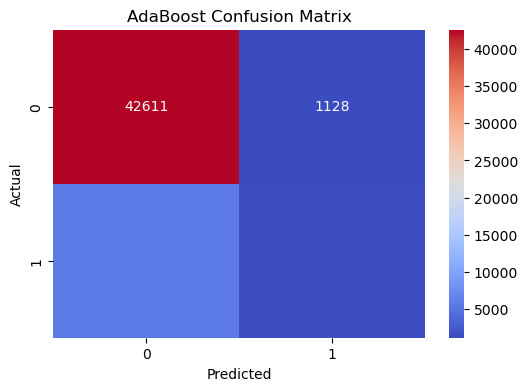

Evaluating KNeighbors Classifier...
Accuracy: 0.8522548092084516
Confusion Matrix:
[[41919  1820]
 [ 5676  1321]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.42      0.19      0.26      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.57      0.59     50736
weighted avg       0.82      0.85      0.83     50736




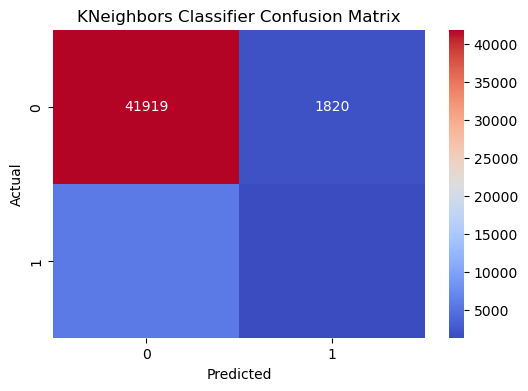

Evaluating Logistic Regression...
Accuracy: 0.8482537054556922
Confusion Matrix:
[[41754     0  1041]
 [  871     0    73]
 [ 5714     0  1283]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736




C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

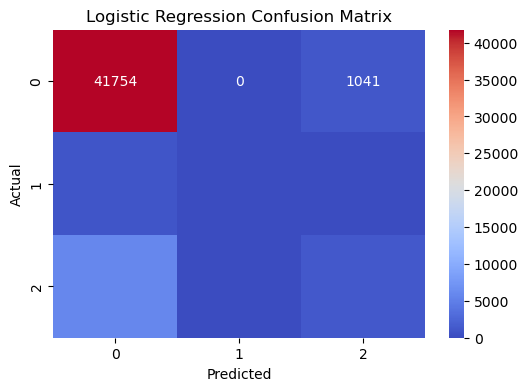

Evaluating Random Forest...
Accuracy: 0.8492983286029644
Confusion Matrix:
[[42299     0   496]
 [  890     0    54]
 [ 6206     0   791]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.59      0.11      0.19      6997

    accuracy                           0.85     50736
   macro avg       0.48      0.37      0.37     50736
weighted avg       0.80      0.85      0.80     50736




C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

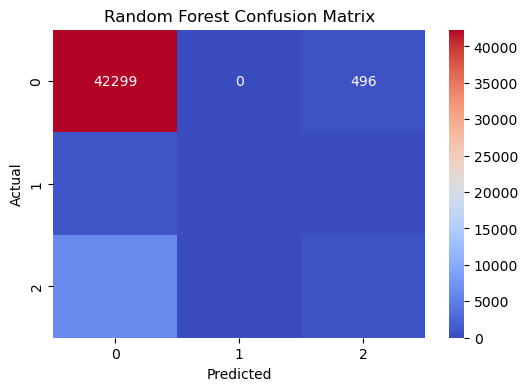

Evaluating Gradient Boosting Classifier...
Accuracy: 0.8506780195521917
Confusion Matrix:
[[41743     0  1052]
 [  839     0   105]
 [ 5580     0  1417]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.55      0.20      0.30      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.82     50736




C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

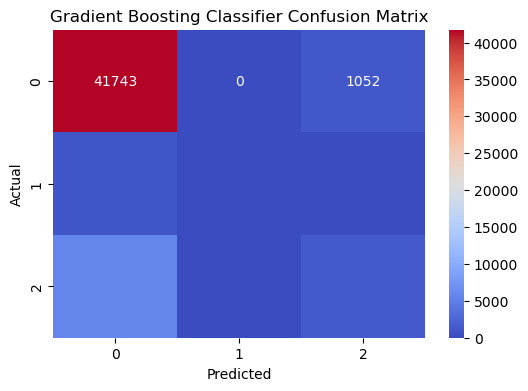

Evaluating AdaBoost...
Accuracy: 0.8500473036896878
Confusion Matrix:
[[41620     0  1175]
 [  843     0   101]
 [ 5489     0  1508]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.22      0.31      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.40      0.41     50736
weighted avg       0.81      0.85      0.82     50736




C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

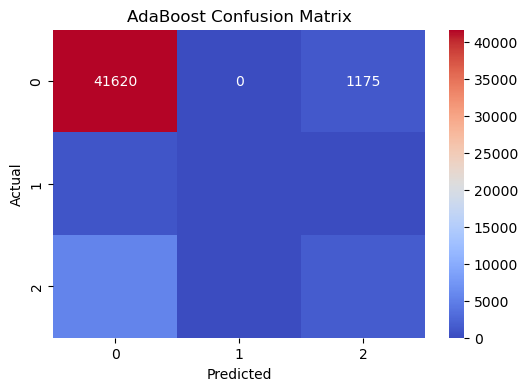

Evaluating KNeighbors Classifier...
Accuracy: 0.8353043204036582
Confusion Matrix:
[[41042     3  1750]
 [  838     0   106]
 [ 5658     1  1338]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.42      0.19      0.26      6997

    accuracy                           0.84     50736
   macro avg       0.43      0.38      0.39     50736
weighted avg       0.79      0.84      0.80     50736




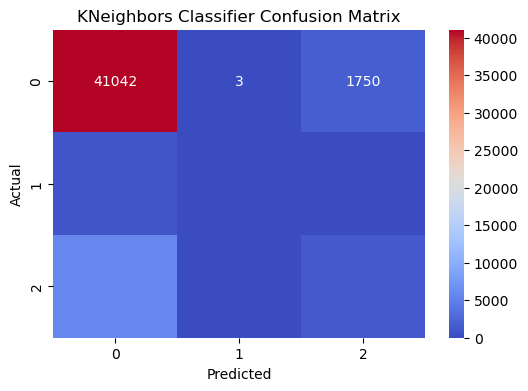

Accuracies for Dataset 1: {'Logistic Regression': 0.7484970648560718, 'Random Forest': 0.7506895820072141, 'Gradient Boosting Classifier': 0.7556404271872127, 'AdaBoost': 0.7518212037626424, 'KNeighbors Classifier': 0.7188627201357947}
Accuracies for Dataset 2: {'Logistic Regression': 0.8658546199936928, 'Random Forest': 0.8662291075370545, 'Gradient Boosting Classifier': 0.8676087984862819, 'AdaBoost': 0.8666035950804163, 'KNeighbors Classifier': 0.8522548092084516}
Accuracies for Dataset 3: {'Logistic Regression': 0.8482537054556922, 'Random Forest': 0.8492983286029644, 'Gradient Boosting Classifier': 0.8506780195521917, 'AdaBoost': 0.8500473036896878, 'KNeighbors Classifier': 0.8353043204036582}


In [23]:
def evaluate_models(best_estimators, X_test, y_test):
    accuracies = {}
    for model_name, model in best_estimators.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[model_name] = accuracy
        print(f"Evaluating {model_name}...")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
        
        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
    return accuracies

# Evaluate models for each dataset
accuracies1 = evaluate_models(best_estimators1, X_test1, y_test1)
accuracies2 = evaluate_models(best_estimators2, X_test2, y_test2)
accuracies3 = evaluate_models(best_estimators3, X_test3, y_test3)

print("Accuracies for Dataset 1:", accuracies1)
print("Accuracies for Dataset 2:", accuracies2)
print("Accuracies for Dataset 3:", accuracies3)


In [26]:
# Calculate overall accuracy
def calculate_overall_accuracy(*accuracies_list):
    total_accuracy = 0
    count = 0
    for accuracies in accuracies_list:
        for accuracy in accuracies.values():
            total_accuracy += accuracy
            count += 1
    return total_accuracy / count

overall_accuracy = calculate_overall_accuracy(accuracies1, accuracies2, accuracies3)
print(f"Overall Model Accuracy: {overall_accuracy:.4f}")


Overall Model Accuracy: 0.8185


In [33]:
def predict_and_average(input_data, scalers, best_estimators):
    print("Predicting diabetes risk...")
    predictions = []
    for scaler, models in zip(scalers, best_estimators):
        print(f"Scaling input data using {scaler}...")
        input_scaled = scaler.transform([input_data])
        model_predictions = []
        for model_name, model in models.items():
            print(f"Predicting with {model_name}...")
            model_predictions.append(model.predict_proba(input_scaled)[0][1])
        predictions.append(sum(model_predictions) / len(model_predictions))
    return sum(predictions) / len(predictions)

# Combine the best estimators and scalers
scalers = [scaler1, scaler2, scaler3]
best_estimators_list = [best_estimators1, best_estimators2, best_estimators3]

# User inputs - Adım adım
input_data = {
    'HighBP': int(input("HighBP (0 or 1): ")),                    # Örnek: 1
    'HighChol': int(input("HighChol (0 or 1): ")),                # Örnek: 1
    'CholCheck': int(input("CholCheck (0 or 1): ")),              # Örnek: 1
    'BMI': float(input("BMI: ")),                                 # Örnek: 35.0
    'Smoker': int(input("Smoker (0 or 1): ")),                    # Örnek: 1
    'Stroke': int(input("Stroke (0 or 1): ")),                    # Örnek: 1
    'HeartDiseaseorAttack': int(input("HeartDiseaseorAttack (0 or 1): ")),  # Örnek: 1
    'PhysActivity': int(input("PhysActivity (0 or 1): ")),        # Örnek: 0
    'Fruits': int(input("Fruits (0 or 1): ")),                    # Örnek: 0
    'Veggies': int(input("Veggies (0 or 1): ")),                  # Örnek: 0
    'HvyAlcoholConsump': int(input("HvyAlcoholConsump (0 or 1): ")),        # Örnek: 1
    'AnyHealthcare': int(input("AnyHealthcare (0 or 1): ")),      # Örnek: 1
    'NoDocbcCost': int(input("NoDocbcCost (0 or 1): ")),          # Örnek: 0
    'GenHlth': int(input("GenHlth (1 to 5): ")),                  # Örnek: 5
    'MentHlth': int(input("MentHlth (Son 30 günde kötü gün sayısı): ")),     # Örnek: 30
    'PhysHlth': int(input("PhysHlth (Son 30 günde kötü gün sayısı): ")),     # Örnek: 30
    'DiffWalk': int(input("DiffWalk (0 veya 1): ")),              # Örnek: 1
    'Sex': int(input("Sex (0: Kadın, 1: Erkek): ")),              # Örnek: 1
    'Age': int(input("Age: ")),                                   # Örnek: 80
    'Education': int(input("Education (1 to 6): ")),              # Örnek: 1
    'Income': int(input("Income (1 to 8): "))                     # Örnek: 1
}

# Convert the input data dictionary to a list for prediction
input_list = list(input_data.values())

# Predict the diabetes risk
risk_percentage = predict_and_average(input_list, scalers, best_estimators_list) * 100
print("Predicted Diabetes Risk: {:.2f}%".format(risk_percentage))


HighBP (0 or 1):  0
HighChol (0 or 1):  0
CholCheck (0 or 1):  1
BMI:  28.6
Smoker (0 or 1):  0
Stroke (0 or 1):  0
HeartDiseaseorAttack (0 or 1):  0
PhysActivity (0 or 1):  0
Fruits (0 or 1):  0
Veggies (0 or 1):  1
HvyAlcoholConsump (0 or 1):  0
AnyHealthcare (0 or 1):  1
NoDocbcCost (0 or 1):  0
GenHlth (1 to 5):  3
MentHlth (Son 30 günde kötü gün sayısı):  25
PhysHlth (Son 30 günde kötü gün sayısı):  4
DiffWalk (0 veya 1):  0
Sex (0: Kadın, 1: Erkek):  1
Age:  23
Education (1 to 6):  4
Income (1 to 8):  1


Predicting diabetes risk...
Scaling input data using StandardScaler()...
Predicting with Logistic Regression...
Predicting with Random Forest...
Predicting with Gradient Boosting Classifier...
Predicting with AdaBoost...
Predicting with KNeighbors Classifier...
Scaling input data using StandardScaler()...
Predicting with Logistic Regression...
Predicting with Random Forest...
Predicting with Gradient Boosting Classifier...
Predicting with AdaBoost...
Predicting with KNeighbors Classifier...
Scaling input data using StandardScaler()...
Predicting with Logistic Regression...
Predicting with Random Forest...
Predicting with Gradient Boosting Classifier...
Predicting with AdaBoost...
Predicting with KNeighbors Classifier...


C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\melih.kalkan\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Diabetes Risk: 29.61%
